In [7]:
import pandas as pd
import numpy as np
import os
import networkx as nx

### KEGG data
*kegg_compounds.csv* was downloaded from KEGG database using KEGGREST and wrapper functions (please, check corresponding R script). It contains a list of metabolites with the reactions in which they are involved.

In [146]:
kegg_data = pd.read_csv("../data/KEGG/kegg_compounds.csv")
print("Dimensions of kegg compounds:", kegg_data.shape)
kegg_data

Dimensions of kegg compounds: (19090, 10)


,ENTRY,NAME,FORMULA,REACTION,PATHWAY,NETWORK,CAS,PubChem,ChEBI,PDB.CCD
0,C00001,H2O;///Water,H2O,R00001 R00002 R00004 R00005 R00009 R00010 R000...,map00190: Oxidative phosphorylation///map00195...,nt06252 Mitochondrial ROS formation///nt06253...,7732-18-5,3303.0,15377,HOH O
1,C00002,ATP;///Adenosine 5'-triphosphate,C10H16N5O13P3,R00002 R00076 R00085 R00086 R00087 R00088 R000...,map00190: Oxidative phosphorylation///map00195...,NaN,56-65-5,3304.0,15422,ATP
2,C00003,NAD+;///NAD;///Nicotinamide adenine dinucleoti...,C21H28N7O14P2,R00023 R00090 R00091 R00092 R00093 R00094 R000...,map00190: Oxidative phosphorylation///map00730...,NaN,53-84-9,3305.0,15846,NAD NAJ
3,C00004,NADH;///DPNH;///Reduced nicotinamide adenine d...,C21H29N7O14P2,R00023 R00090 R00091 R00092 R00093 R00094 R000...,map00190: Oxidative phosphorylation///map01100...,nt06418 Oxidative phosphorylation///nt06460 ...,58-68-4,3306.0,16908,NAI
4,C00005,NADPH;///TPNH;///Reduced nicotinamide adenine ...,C21H30N7O17P3,R00105 R00106 R00108 R00109 R00111 R00112 R001...,map00195: Photosynthesis///map00480: Glutathio...,nt06019 Steroid hormone biosynthesis///nt0602...,2646-71-1,3307.0,16474,NDP
...,...,...,...,...,...,...,...,...,...,...
19085,C22643,2-(Thiiran-2-yl)acetonitrile,C4H5NS,R13134,NaN,NaN,NaN,NaN,NaN,NaN
19086,C22646,N-(4-Aminobutylpyrrolinium) ion,C8H17N2,R13138 R13139,NaN,NaN,NaN,NaN,NaN,NaN
19087,C22647,N-(4-Oxobutylpyrrolinium) ion,C8H14NO,R13139 R13140,NaN,NaN,NaN,NaN,NaN,NaN
19088,C22648,1-Formylpyrrolizidine,C8H13NO,R13140 R13141,NaN,NaN,NaN,NaN,NaN,NaN


In [147]:
len(kegg_data.ENTRY.unique())

19090

#### Extract CAS, PubCHEM, ChEBI individually.


In [148]:
# Extract CAS, PubCHEM, ChEBI individually.
if not os.path.exists("../data/KEGG/kegg_compounds_CAS.csv"):
    kegg_data[["ENTRY", "CAS"]].to_csv("../data/KEGG/kegg_compounds_CAS.csv", index=False)
    kegg_data[["ENTRY", "PubChem"]].to_csv("../data/KEGG/kegg_compounds_PubChem.csv", index=False)

These files were sent to https://pubchem.ncbi.nlm.nih.gov/idexchange/idexchange.cgi to translate PubChem (SIDs) into PUBCHEM_CID, INCHIKEYS and SMILES, and CAS into PUBCHEM_CID, INCHIKEYS and SMILES in order to have more chemical identifiers for each metabolite.

#### Add PUBCHEM_CID, INCHIKEYS and SMILES to kegg_compounds from KEGG PubChem IDs

In [149]:
pubchem_CID = pd.read_csv("../data/KEGG/pubchem_CID.txt", sep="\t", header=None)
pubchem_CID.columns = ["PUBCHEM_SID", "PUBCHEM_CID"]
pubchem_CID['PUBCHEM_SID'] = pubchem_CID['PUBCHEM_SID'].astype(float)
kegg_data = kegg_data.merge(pubchem_CID, left_on='PubChem', right_on='PUBCHEM_SID', how='left')
kegg_data.drop('PUBCHEM_SID', axis=1, inplace=True)
kegg_data


,ENTRY,NAME,FORMULA,REACTION,PATHWAY,NETWORK,CAS,PubChem,ChEBI,PDB.CCD,PUBCHEM_CID
0,C00001,H2O;///Water,H2O,R00001 R00002 R00004 R00005 R00009 R00010 R000...,map00190: Oxidative phosphorylation///map00195...,nt06252 Mitochondrial ROS formation///nt06253...,7732-18-5,3303.0,15377,HOH O,962.0
1,C00002,ATP;///Adenosine 5'-triphosphate,C10H16N5O13P3,R00002 R00076 R00085 R00086 R00087 R00088 R000...,map00190: Oxidative phosphorylation///map00195...,NaN,56-65-5,3304.0,15422,ATP,5957.0
2,C00003,NAD+;///NAD;///Nicotinamide adenine dinucleoti...,C21H28N7O14P2,R00023 R00090 R00091 R00092 R00093 R00094 R000...,map00190: Oxidative phosphorylation///map00730...,NaN,53-84-9,3305.0,15846,NAD NAJ,5893.0
3,C00004,NADH;///DPNH;///Reduced nicotinamide adenine d...,C21H29N7O14P2,R00023 R00090 R00091 R00092 R00093 R00094 R000...,map00190: Oxidative phosphorylation///map01100...,nt06418 Oxidative phosphorylation///nt06460 ...,58-68-4,3306.0,16908,NAI,439153.0
4,C00005,NADPH;///TPNH;///Reduced nicotinamide adenine ...,C21H30N7O17P3,R00105 R00106 R00108 R00109 R00111 R00112 R001...,map00195: Photosynthesis///map00480: Glutathio...,nt06019 Steroid hormone biosynthesis///nt0602...,2646-71-1,3307.0,16474,NDP,5884.0
...,...,...,...,...,...,...,...,...,...,...,...
19085,C22643,2-(Thiiran-2-yl)acetonitrile,C4H5NS,R13134,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19086,C22646,N-(4-Aminobutylpyrrolinium) ion,C8H17N2,R13138 R13139,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19087,C22647,N-(4-Oxobutylpyrrolinium) ion,C8H14NO,R13139 R13140,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19088,C22648,1-Formylpyrrolizidine,C8H13NO,R13140 R13141,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [150]:
pubchem_INCHI = pd.read_csv("../data/KEGG/pubchem_inchikeys.txt", sep="\t", header=None)
pubchem_INCHI.columns = ["PUBCHEM_SID", "INCHIKEYS"]
pubchem_INCHI['PUBCHEM_SID'] = pubchem_INCHI['PUBCHEM_SID'].astype(float)
kegg_data = kegg_data.merge(pubchem_INCHI, left_on='PubChem', right_on='PUBCHEM_SID', how='left')
kegg_data.drop('PUBCHEM_SID', axis=1, inplace=True)
kegg_data

,ENTRY,NAME,FORMULA,REACTION,PATHWAY,NETWORK,CAS,PubChem,ChEBI,PDB.CCD,PUBCHEM_CID,INCHIKEYS
0,C00001,H2O;///Water,H2O,R00001 R00002 R00004 R00005 R00009 R00010 R000...,map00190: Oxidative phosphorylation///map00195...,nt06252 Mitochondrial ROS formation///nt06253...,7732-18-5,3303.0,15377,HOH O,962.0,XLYOFNOQVPJJNP-UHFFFAOYSA-N
1,C00002,ATP;///Adenosine 5'-triphosphate,C10H16N5O13P3,R00002 R00076 R00085 R00086 R00087 R00088 R000...,map00190: Oxidative phosphorylation///map00195...,NaN,56-65-5,3304.0,15422,ATP,5957.0,ZKHQWZAMYRWXGA-KQYNXXCUSA-N
2,C00003,NAD+;///NAD;///Nicotinamide adenine dinucleoti...,C21H28N7O14P2,R00023 R00090 R00091 R00092 R00093 R00094 R000...,map00190: Oxidative phosphorylation///map00730...,NaN,53-84-9,3305.0,15846,NAD NAJ,5893.0,BAWFJGJZGIEFAR-NNYOXOHSSA-O
3,C00004,NADH;///DPNH;///Reduced nicotinamide adenine d...,C21H29N7O14P2,R00023 R00090 R00091 R00092 R00093 R00094 R000...,map00190: Oxidative phosphorylation///map01100...,nt06418 Oxidative phosphorylation///nt06460 ...,58-68-4,3306.0,16908,NAI,439153.0,BOPGDPNILDQYTO-NNYOXOHSSA-N
4,C00005,NADPH;///TPNH;///Reduced nicotinamide adenine ...,C21H30N7O17P3,R00105 R00106 R00108 R00109 R00111 R00112 R001...,map00195: Photosynthesis///map00480: Glutathio...,nt06019 Steroid hormone biosynthesis///nt0602...,2646-71-1,3307.0,16474,NDP,5884.0,ACFIXJIJDZMPPO-NNYOXOHSSA-N
...,...,...,...,...,...,...,...,...,...,...,...,...
19085,C22643,2-(Thiiran-2-yl)acetonitrile,C4H5NS,R13134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19086,C22646,N-(4-Aminobutylpyrrolinium) ion,C8H17N2,R13138 R13139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19087,C22647,N-(4-Oxobutylpyrrolinium) ion,C8H14NO,R13139 R13140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19088,C22648,1-Formylpyrrolizidine,C8H13NO,R13140 R13141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [151]:
pubchem_SMILES = pd.read_csv("../data/KEGG/pubchem_smiles.txt", sep="\t", header=None)
pubchem_SMILES.columns = ["PUBCHEM_SID", "SMILES"]
pubchem_SMILES['PUBCHEM_SID'] = pubchem_SMILES['PUBCHEM_SID'].astype(float)
kegg_data = kegg_data.merge(pubchem_SMILES, left_on='PubChem', right_on='PUBCHEM_SID', how='left')
kegg_data.drop('PUBCHEM_SID', axis=1, inplace=True)
kegg_data

,ENTRY,NAME,FORMULA,REACTION,PATHWAY,NETWORK,CAS,PubChem,ChEBI,PDB.CCD,PUBCHEM_CID,INCHIKEYS,SMILES
0,C00001,H2O;///Water,H2O,R00001 R00002 R00004 R00005 R00009 R00010 R000...,map00190: Oxidative phosphorylation///map00195...,nt06252 Mitochondrial ROS formation///nt06253...,7732-18-5,3303.0,15377,HOH O,962.0,XLYOFNOQVPJJNP-UHFFFAOYSA-N,O
1,C00002,ATP;///Adenosine 5'-triphosphate,C10H16N5O13P3,R00002 R00076 R00085 R00086 R00087 R00088 R000...,map00190: Oxidative phosphorylation///map00195...,NaN,56-65-5,3304.0,15422,ATP,5957.0,ZKHQWZAMYRWXGA-KQYNXXCUSA-N,C1=NC(=C2C(=N1)N(C=N2)[C@H]3[C@@H]([C@@H]([C@H...
2,C00003,NAD+;///NAD;///Nicotinamide adenine dinucleoti...,C21H28N7O14P2,R00023 R00090 R00091 R00092 R00093 R00094 R000...,map00190: Oxidative phosphorylation///map00730...,NaN,53-84-9,3305.0,15846,NAD NAJ,5893.0,BAWFJGJZGIEFAR-NNYOXOHSSA-O,C1=CC(=C[N+](=C1)[C@H]2[C@@H]([C@@H]([C@H](O2)...
3,C00004,NADH;///DPNH;///Reduced nicotinamide adenine d...,C21H29N7O14P2,R00023 R00090 R00091 R00092 R00093 R00094 R000...,map00190: Oxidative phosphorylation///map01100...,nt06418 Oxidative phosphorylation///nt06460 ...,58-68-4,3306.0,16908,NAI,439153.0,BOPGDPNILDQYTO-NNYOXOHSSA-N,C1C=CN(C=C1C(=O)N)[C@H]2[C@@H]([C@@H]([C@H](O2...
4,C00005,NADPH;///TPNH;///Reduced nicotinamide adenine ...,C21H30N7O17P3,R00105 R00106 R00108 R00109 R00111 R00112 R001...,map00195: Photosynthesis///map00480: Glutathio...,nt06019 Steroid hormone biosynthesis///nt0602...,2646-71-1,3307.0,16474,NDP,5884.0,ACFIXJIJDZMPPO-NNYOXOHSSA-N,C1C=CN(C=C1C(=O)N)[C@H]2[C@@H]([C@@H]([C@H](O2...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19085,C22643,2-(Thiiran-2-yl)acetonitrile,C4H5NS,R13134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19086,C22646,N-(4-Aminobutylpyrrolinium) ion,C8H17N2,R13138 R13139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19087,C22647,N-(4-Oxobutylpyrrolinium) ion,C8H14NO,R13139 R13140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19088,C22648,1-Formylpyrrolizidine,C8H13NO,R13140 R13141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [152]:
len(kegg_data.ENTRY.unique())

19090

#### Add PUBCHEM_CID, INCHIKEYS and SMILES to kegg_compounds from KEGG CAS IDs

In [153]:
CAS_PUBCHEM = pd.read_csv("../data/KEGG/CAS_CID.txt", sep="\t", header=None)
CAS_PUBCHEM.columns = ["CAS", "PUBCHEM_CID"]

In [154]:
# Merge based on the common column 'CAS'
kegg_data = pd.merge(kegg_data, CAS_PUBCHEM[['CAS', 'PUBCHEM_CID']], on='CAS', how='left', suffixes=('_df1', '_df2'))
kegg_data.drop_duplicates(subset=['ENTRY'], inplace=True)
# Use fillna to fill missing values in Pubchem_CIDs_df1 with values from Pubchem_CIDs_df2
kegg_data['PUBCHEM_CID_df1'] = kegg_data['PUBCHEM_CID_df1'].fillna(kegg_data['PUBCHEM_CID_df2'])
# Drop the redundant Pubchem_CIDs_df2 column and rename column _df1
kegg_data = kegg_data.drop(columns=['PUBCHEM_CID_df2'])
kegg_data = kegg_data.rename(columns={'PUBCHEM_CID_df1': 'PUBCHEM_CID'})
kegg_data.drop_duplicates(subset=['ENTRY'])
kegg_data


,ENTRY,NAME,FORMULA,REACTION,PATHWAY,NETWORK,CAS,PubChem,ChEBI,PDB.CCD,PUBCHEM_CID,INCHIKEYS,SMILES
0,C00001,H2O;///Water,H2O,R00001 R00002 R00004 R00005 R00009 R00010 R000...,map00190: Oxidative phosphorylation///map00195...,nt06252 Mitochondrial ROS formation///nt06253...,7732-18-5,3303.0,15377,HOH O,962.0,XLYOFNOQVPJJNP-UHFFFAOYSA-N,O
1,C00002,ATP;///Adenosine 5'-triphosphate,C10H16N5O13P3,R00002 R00076 R00085 R00086 R00087 R00088 R000...,map00190: Oxidative phosphorylation///map00195...,NaN,56-65-5,3304.0,15422,ATP,5957.0,ZKHQWZAMYRWXGA-KQYNXXCUSA-N,C1=NC(=C2C(=N1)N(C=N2)[C@H]3[C@@H]([C@@H]([C@H...
2,C00003,NAD+;///NAD;///Nicotinamide adenine dinucleoti...,C21H28N7O14P2,R00023 R00090 R00091 R00092 R00093 R00094 R000...,map00190: Oxidative phosphorylation///map00730...,NaN,53-84-9,3305.0,15846,NAD NAJ,5893.0,BAWFJGJZGIEFAR-NNYOXOHSSA-O,C1=CC(=C[N+](=C1)[C@H]2[C@@H]([C@@H]([C@H](O2)...
7,C00004,NADH;///DPNH;///Reduced nicotinamide adenine d...,C21H29N7O14P2,R00023 R00090 R00091 R00092 R00093 R00094 R000...,map00190: Oxidative phosphorylation///map01100...,nt06418 Oxidative phosphorylation///nt06460 ...,58-68-4,3306.0,16908,NAI,439153.0,BOPGDPNILDQYTO-NNYOXOHSSA-N,C1C=CN(C=C1C(=O)N)[C@H]2[C@@H]([C@@H]([C@H](O2...
8,C00005,NADPH;///TPNH;///Reduced nicotinamide adenine ...,C21H30N7O17P3,R00105 R00106 R00108 R00109 R00111 R00112 R001...,map00195: Photosynthesis///map00480: Glutathio...,nt06019 Steroid hormone biosynthesis///nt0602...,2646-71-1,3307.0,16474,NDP,5884.0,ACFIXJIJDZMPPO-NNYOXOHSSA-N,C1C=CN(C=C1C(=O)N)[C@H]2[C@@H]([C@@H]([C@H](O2...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25189,C22643,2-(Thiiran-2-yl)acetonitrile,C4H5NS,R13134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25190,C22646,N-(4-Aminobutylpyrrolinium) ion,C8H17N2,R13138 R13139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25191,C22647,N-(4-Oxobutylpyrrolinium) ion,C8H14NO,R13139 R13140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25192,C22648,1-Formylpyrrolizidine,C8H13NO,R13140 R13141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [155]:
CAS_INCHI = pd.read_csv("../data/KEGG/CAS_inchikeys.txt", sep="\t", header=None)
CAS_INCHI.columns = ["CAS", "INCHIKEYS"]
kegg_data = pd.merge(kegg_data, CAS_INCHI[['CAS', 'INCHIKEYS']], on='CAS', how='left', suffixes=('_df1', '_df2'))
kegg_data.drop_duplicates(subset=['ENTRY'], inplace=True)
kegg_data['INCHIKEYS_df1'] = kegg_data['INCHIKEYS_df1'].fillna(kegg_data['INCHIKEYS_df2'])
kegg_data = kegg_data.drop(columns=['INCHIKEYS_df2'])
kegg_data = kegg_data.rename(columns={'INCHIKEYS_df1': 'INCHIKEYS'})
kegg_data.drop_duplicates(subset='ENTRY', inplace=True)
kegg_data

,ENTRY,NAME,FORMULA,REACTION,PATHWAY,NETWORK,CAS,PubChem,ChEBI,PDB.CCD,PUBCHEM_CID,INCHIKEYS,SMILES
0,C00001,H2O;///Water,H2O,R00001 R00002 R00004 R00005 R00009 R00010 R000...,map00190: Oxidative phosphorylation///map00195...,nt06252 Mitochondrial ROS formation///nt06253...,7732-18-5,3303.0,15377,HOH O,962.0,XLYOFNOQVPJJNP-UHFFFAOYSA-N,O
1,C00002,ATP;///Adenosine 5'-triphosphate,C10H16N5O13P3,R00002 R00076 R00085 R00086 R00087 R00088 R000...,map00190: Oxidative phosphorylation///map00195...,NaN,56-65-5,3304.0,15422,ATP,5957.0,ZKHQWZAMYRWXGA-KQYNXXCUSA-N,C1=NC(=C2C(=N1)N(C=N2)[C@H]3[C@@H]([C@@H]([C@H...
2,C00003,NAD+;///NAD;///Nicotinamide adenine dinucleoti...,C21H28N7O14P2,R00023 R00090 R00091 R00092 R00093 R00094 R000...,map00190: Oxidative phosphorylation///map00730...,NaN,53-84-9,3305.0,15846,NAD NAJ,5893.0,BAWFJGJZGIEFAR-NNYOXOHSSA-O,C1=CC(=C[N+](=C1)[C@H]2[C@@H]([C@@H]([C@H](O2)...
7,C00004,NADH;///DPNH;///Reduced nicotinamide adenine d...,C21H29N7O14P2,R00023 R00090 R00091 R00092 R00093 R00094 R000...,map00190: Oxidative phosphorylation///map01100...,nt06418 Oxidative phosphorylation///nt06460 ...,58-68-4,3306.0,16908,NAI,439153.0,BOPGDPNILDQYTO-NNYOXOHSSA-N,C1C=CN(C=C1C(=O)N)[C@H]2[C@@H]([C@@H]([C@H](O2...
8,C00005,NADPH;///TPNH;///Reduced nicotinamide adenine ...,C21H30N7O17P3,R00105 R00106 R00108 R00109 R00111 R00112 R001...,map00195: Photosynthesis///map00480: Glutathio...,nt06019 Steroid hormone biosynthesis///nt0602...,2646-71-1,3307.0,16474,NDP,5884.0,ACFIXJIJDZMPPO-NNYOXOHSSA-N,C1C=CN(C=C1C(=O)N)[C@H]2[C@@H]([C@@H]([C@H](O2...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25189,C22643,2-(Thiiran-2-yl)acetonitrile,C4H5NS,R13134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25190,C22646,N-(4-Aminobutylpyrrolinium) ion,C8H17N2,R13138 R13139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25191,C22647,N-(4-Oxobutylpyrrolinium) ion,C8H14NO,R13139 R13140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25192,C22648,1-Formylpyrrolizidine,C8H13NO,R13140 R13141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [156]:
CAS_SMILES = pd.read_csv("../data/KEGG/CAS_SMILES.txt", sep="\t", header=None)
CAS_SMILES.columns = ["CAS", "SMILES"]
kegg_data = pd.merge(kegg_data, CAS_SMILES[['CAS', 'SMILES']], on='CAS', how='left', suffixes=('_df1', '_df2'))
kegg_data.drop_duplicates(subset='ENTRY', inplace=True)
kegg_data['SMILES_df1'] = kegg_data['SMILES_df1'].fillna(kegg_data['SMILES_df2'])
kegg_data = kegg_data.drop(columns=['SMILES_df2'])
kegg_data = kegg_data.rename(columns={'SMILES_df1': 'SMILES'})
kegg_data.drop_duplicates(subset='ENTRY', inplace=True)
kegg_data

,ENTRY,NAME,FORMULA,REACTION,PATHWAY,NETWORK,CAS,PubChem,ChEBI,PDB.CCD,PUBCHEM_CID,INCHIKEYS,SMILES
0,C00001,H2O;///Water,H2O,R00001 R00002 R00004 R00005 R00009 R00010 R000...,map00190: Oxidative phosphorylation///map00195...,nt06252 Mitochondrial ROS formation///nt06253...,7732-18-5,3303.0,15377,HOH O,962.0,XLYOFNOQVPJJNP-UHFFFAOYSA-N,O
5,C00002,ATP;///Adenosine 5'-triphosphate,C10H16N5O13P3,R00002 R00076 R00085 R00086 R00087 R00088 R000...,map00190: Oxidative phosphorylation///map00195...,NaN,56-65-5,3304.0,15422,ATP,5957.0,ZKHQWZAMYRWXGA-KQYNXXCUSA-N,C1=NC(=C2C(=N1)N(C=N2)[C@H]3[C@@H]([C@@H]([C@H...
13,C00003,NAD+;///NAD;///Nicotinamide adenine dinucleoti...,C21H28N7O14P2,R00023 R00090 R00091 R00092 R00093 R00094 R000...,map00190: Oxidative phosphorylation///map00730...,NaN,53-84-9,3305.0,15846,NAD NAJ,5893.0,BAWFJGJZGIEFAR-NNYOXOHSSA-O,C1=CC(=C[N+](=C1)[C@H]2[C@@H]([C@@H]([C@H](O2)...
32,C00004,NADH;///DPNH;///Reduced nicotinamide adenine d...,C21H29N7O14P2,R00023 R00090 R00091 R00092 R00093 R00094 R000...,map00190: Oxidative phosphorylation///map01100...,nt06418 Oxidative phosphorylation///nt06460 ...,58-68-4,3306.0,16908,NAI,439153.0,BOPGDPNILDQYTO-NNYOXOHSSA-N,C1C=CN(C=C1C(=O)N)[C@H]2[C@@H]([C@@H]([C@H](O2...
40,C00005,NADPH;///TPNH;///Reduced nicotinamide adenine ...,C21H30N7O17P3,R00105 R00106 R00108 R00109 R00111 R00112 R001...,map00195: Photosynthesis///map00480: Glutathio...,nt06019 Steroid hormone biosynthesis///nt0602...,2646-71-1,3307.0,16474,NDP,5884.0,ACFIXJIJDZMPPO-NNYOXOHSSA-N,C1C=CN(C=C1C(=O)N)[C@H]2[C@@H]([C@@H]([C@H](O2...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47824,C22643,2-(Thiiran-2-yl)acetonitrile,C4H5NS,R13134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47825,C22646,N-(4-Aminobutylpyrrolinium) ion,C8H17N2,R13138 R13139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47826,C22647,N-(4-Oxobutylpyrrolinium) ion,C8H14NO,R13139 R13140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47827,C22648,1-Formylpyrrolizidine,C8H13NO,R13140 R13141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [157]:
kegg_data

,ENTRY,NAME,FORMULA,REACTION,PATHWAY,NETWORK,CAS,PubChem,ChEBI,PDB.CCD,PUBCHEM_CID,INCHIKEYS,SMILES
0,C00001,H2O;///Water,H2O,R00001 R00002 R00004 R00005 R00009 R00010 R000...,map00190: Oxidative phosphorylation///map00195...,nt06252 Mitochondrial ROS formation///nt06253...,7732-18-5,3303.0,15377,HOH O,962.0,XLYOFNOQVPJJNP-UHFFFAOYSA-N,O
5,C00002,ATP;///Adenosine 5'-triphosphate,C10H16N5O13P3,R00002 R00076 R00085 R00086 R00087 R00088 R000...,map00190: Oxidative phosphorylation///map00195...,NaN,56-65-5,3304.0,15422,ATP,5957.0,ZKHQWZAMYRWXGA-KQYNXXCUSA-N,C1=NC(=C2C(=N1)N(C=N2)[C@H]3[C@@H]([C@@H]([C@H...
13,C00003,NAD+;///NAD;///Nicotinamide adenine dinucleoti...,C21H28N7O14P2,R00023 R00090 R00091 R00092 R00093 R00094 R000...,map00190: Oxidative phosphorylation///map00730...,NaN,53-84-9,3305.0,15846,NAD NAJ,5893.0,BAWFJGJZGIEFAR-NNYOXOHSSA-O,C1=CC(=C[N+](=C1)[C@H]2[C@@H]([C@@H]([C@H](O2)...
32,C00004,NADH;///DPNH;///Reduced nicotinamide adenine d...,C21H29N7O14P2,R00023 R00090 R00091 R00092 R00093 R00094 R000...,map00190: Oxidative phosphorylation///map01100...,nt06418 Oxidative phosphorylation///nt06460 ...,58-68-4,3306.0,16908,NAI,439153.0,BOPGDPNILDQYTO-NNYOXOHSSA-N,C1C=CN(C=C1C(=O)N)[C@H]2[C@@H]([C@@H]([C@H](O2...
40,C00005,NADPH;///TPNH;///Reduced nicotinamide adenine ...,C21H30N7O17P3,R00105 R00106 R00108 R00109 R00111 R00112 R001...,map00195: Photosynthesis///map00480: Glutathio...,nt06019 Steroid hormone biosynthesis///nt0602...,2646-71-1,3307.0,16474,NDP,5884.0,ACFIXJIJDZMPPO-NNYOXOHSSA-N,C1C=CN(C=C1C(=O)N)[C@H]2[C@@H]([C@@H]([C@H](O2...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47824,C22643,2-(Thiiran-2-yl)acetonitrile,C4H5NS,R13134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47825,C22646,N-(4-Aminobutylpyrrolinium) ion,C8H17N2,R13138 R13139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47826,C22647,N-(4-Oxobutylpyrrolinium) ion,C8H14NO,R13139 R13140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47827,C22648,1-Formylpyrrolizidine,C8H13NO,R13140 R13141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Metabolon annotation

In [158]:
annotation = pd.read_csv("../data/annotation_complete.csv")
annotation

,CHEM_ID,LIB_ID,COMP_ID,CHRO_LIB_ENTRY_ID,SUPER_PATHWAY,SUB_PATHWAY,PATHWAY_SORTORDER,TYPE,INCHIKEY,SMILES,...,CHEMSPIDER,HMDB,KEGG,PUBCHEM,PLATFORM,ANALYSIS_ID,babel_INCHIKEY,PUBCHEM_CID,PUBCHEM_SID,ChEBI
0,35,400,42370,166164,Amino Acid,Glutamate Metabolism,62,NAMED,DWAKNKKXGALPNW-REWHXWOFAV,OC(C1CCC=N1)=O,...,10140206,HMDB0001301,C04322,11966181,Pos Early,M35,DWAKNKKXGALPNW-UHFFFAOYSA-N,1196.0,6977.0,1372.0
1,50,400,485,155305,Amino Acid,Polyamine Metabolism,545,NAMED,ATHGHQPFGPMSJY-UHFFFAOYAK,NCCCCNCCCN,...,1071,HMDB0001257,C00315,1102,Pos Early,M50,ATHGHQPFGPMSJY-UHFFFAOYSA-N,1102.0,3609.0,16610.0
2,55,400,27665,155829,Cofactors and Vitamins,Nicotinate and Nicotinamide Metabolism,4317,NAMED,LDHMAVIPBRSVRG-UHFFFAOYAE,C[N+]1=CC(C([NH-])=O)=CC=C1,...,8305504,HMDB0000699,C02918,457,Pos Early,M55,LDHMAVIPBRSVRG-UHFFFAOYSA-N,10129985.0,15119991.0,NaN
3,62,209,38395,143675,Lipid,"Fatty Acid, Dihydroxy",2031,NAMED,CQSLTKIXAJTQGA-FLIBITNWBI,CCCCCC(C(C/C=C\CCCCCCCC(O)=O)O)O,...,8412123,HMDB0004705,C14829,10236635,Neg,M62,CQSLTKIXAJTQGA-FLIBITNWSA-N,10236635.0,15238530.0,72665.0
4,93,305,528,146398,Energy,TCA Cycle,1446,NAMED,KPGXRSRHYNQIFN-UHFFFAOYAN,O=C(C(O)=O)CCC(O)=O,...,50,HMDB0000208,C00026,51,Polar,M93,KPGXRSRHYNQIFN-UHFFFAOYSA-N,51.0,3328.0,30915.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1202,100022015,209,64415,237569,Partially Characterized Molecules,Partially Characterized Molecules,6452,NAMED,NaN,NaN,...,NaN,NaN,NaN,NaN,Neg,M100022015,NaN,NaN,NaN,NaN
1203,100022041,400,64571,238237,Peptide,Modified Peptides,1219,NAMED,NaN,O=C(N1CCCC1C([O-])=O)C2CCC[N+]2(C)C,...,NaN,NaN,NaN,NaN,Pos Early,M100022041,VOWFCBSRZKGKTF-UHFFFAOYSA-N,NaN,NaN,NaN
1204,100022120,400,64568,238235,Amino Acid,Tryptophan Metabolism,263,NAMED,NaN,OC(C(N)(C)N(C1=C(C2)C=CC=C1)C2=O)=O,...,NaN,NaN,NaN,20977764,Pos Early,M100022120,YLEQTOAIAOPFBY-UHFFFAOYSA-N,20977764.0,34405738.0,NaN
1205,100022127,209,64591,238327,Lipid,Corticosteroids,3324,NAMED,NaN,[H][C@@]12C[C@H](OC3C(O)C(O)C(O)C(C(O)=O)O3)CC...,...,NaN,NaN,NaN,NaN,Neg,M100022127,QUOCEDQXFGCYTL-QMELEVSMSA-N,NaN,NaN,NaN


### Merge based on KEGG IDs

In [159]:
split_df = annotation['KEGG'].str.split(',', expand=True)
split_df.columns = ['KEGG0', 'KEGG1', 'KEGG2', 'KEGG3']
annotation = pd.concat([annotation, split_df], axis=1)
# merge with kegg0
annotation = annotation.merge(kegg_data[['ENTRY', 'REACTION']], left_on='KEGG0', right_on='ENTRY', how='left')
annotation = annotation.drop('ENTRY', axis=1)
print(annotation[~annotation['REACTION'].isnull()].shape)
annotation

(359, 28)


,CHEM_ID,LIB_ID,COMP_ID,CHRO_LIB_ENTRY_ID,SUPER_PATHWAY,SUB_PATHWAY,PATHWAY_SORTORDER,TYPE,INCHIKEY,SMILES,...,ANALYSIS_ID,babel_INCHIKEY,PUBCHEM_CID,PUBCHEM_SID,ChEBI,KEGG0,KEGG1,KEGG2,KEGG3,REACTION
0,35,400,42370,166164,Amino Acid,Glutamate Metabolism,62,NAMED,DWAKNKKXGALPNW-REWHXWOFAV,OC(C1CCC=N1)=O,...,M35,DWAKNKKXGALPNW-UHFFFAOYSA-N,1196.0,6977.0,1372.0,C04322,None,None,None,R00668
1,50,400,485,155305,Amino Acid,Polyamine Metabolism,545,NAMED,ATHGHQPFGPMSJY-UHFFFAOYAK,NCCCCNCCCN,...,M50,ATHGHQPFGPMSJY-UHFFFAOYSA-N,1102.0,3609.0,16610.0,C00315,None,None,None,R01914 R01915 R01917 R01918 R01919 R01920 R028...
2,55,400,27665,155829,Cofactors and Vitamins,Nicotinate and Nicotinamide Metabolism,4317,NAMED,LDHMAVIPBRSVRG-UHFFFAOYAE,C[N+]1=CC(C([NH-])=O)=CC=C1,...,M55,LDHMAVIPBRSVRG-UHFFFAOYSA-N,10129985.0,15119991.0,NaN,C02918,None,None,None,R01269 R04085 R08408
3,62,209,38395,143675,Lipid,"Fatty Acid, Dihydroxy",2031,NAMED,CQSLTKIXAJTQGA-FLIBITNWBI,CCCCCC(C(C/C=C\CCCCCCCC(O)=O)O)O,...,M62,CQSLTKIXAJTQGA-FLIBITNWSA-N,10236635.0,15238530.0,72665.0,C14829,None,None,None,R07121
4,93,305,528,146398,Energy,TCA Cycle,1446,NAMED,KPGXRSRHYNQIFN-UHFFFAOYAN,O=C(C(O)=O)CCC(O)=O,...,M93,KPGXRSRHYNQIFN-UHFFFAOYSA-N,51.0,3328.0,30915.0,C00026,None,None,None,R00021 R00093 R00114 R00243 R00248 R00250 R002...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1202,100022015,209,64415,237569,Partially Characterized Molecules,Partially Characterized Molecules,6452,NAMED,NaN,NaN,...,M100022015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1203,100022041,400,64571,238237,Peptide,Modified Peptides,1219,NAMED,NaN,O=C(N1CCCC1C([O-])=O)C2CCC[N+]2(C)C,...,M100022041,VOWFCBSRZKGKTF-UHFFFAOYSA-N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1204,100022120,400,64568,238235,Amino Acid,Tryptophan Metabolism,263,NAMED,NaN,OC(C(N)(C)N(C1=C(C2)C=CC=C1)C2=O)=O,...,M100022120,YLEQTOAIAOPFBY-UHFFFAOYSA-N,20977764.0,34405738.0,NaN,NaN,NaN,NaN,NaN,NaN
1205,100022127,209,64591,238327,Lipid,Corticosteroids,3324,NAMED,NaN,[H][C@@]12C[C@H](OC3C(O)C(O)C(O)C(C(O)=O)O3)CC...,...,M100022127,QUOCEDQXFGCYTL-QMELEVSMSA-N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [160]:
# move mismatches to un_annotated
un_annotated = annotation[annotation['REACTION'].isnull()]
un_annotated.drop("REACTION", inplace=True, axis=1)
annotation = annotation[~annotation['REACTION'].isnull()]
un_annotated = un_annotated.drop_duplicates()
print(annotation.shape, un_annotated.shape)


(359, 28) (848, 27)


/Users/elisa.gomezdelope/opt/anaconda3/envs/py-pytorch/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [161]:
# merge with kegg1
un_annotated = un_annotated.merge(kegg_data[['ENTRY', 'REACTION']], left_on='KEGG1', right_on='ENTRY', how='left')
un_annotated = un_annotated.drop('ENTRY', axis=1)
print(un_annotated[~un_annotated['REACTION'].isnull()].shape)

(5, 28)


In [162]:
# move matches from un_annotated to annotation
annotation = pd.concat([annotation, un_annotated[~un_annotated['REACTION'].isnull()]])
un_annotated = un_annotated[un_annotated['REACTION'].isnull()]
un_annotated = un_annotated.drop(columns=['REACTION'])
un_annotated = un_annotated.drop_duplicates()
print(annotation.shape, un_annotated.shape)



(364, 28) (843, 27)


In [163]:
# merge with kegg2
un_annotated = un_annotated.merge(kegg_data[['ENTRY', 'REACTION']], left_on='KEGG2', right_on='ENTRY', how='left')
un_annotated = un_annotated.drop('ENTRY', axis=1)
print(un_annotated[~un_annotated['REACTION'].isnull()].shape)

(1, 28)


In [164]:
# move matches from un_annotated to annotation
annotation = pd.concat([annotation, un_annotated[~un_annotated['REACTION'].isnull()]])
un_annotated = un_annotated[un_annotated['REACTION'].isnull()]
un_annotated = un_annotated.drop(columns=['REACTION'])
un_annotated = un_annotated.drop_duplicates()
print(annotation.shape, un_annotated.shape)

(365, 28) (842, 27)


In [165]:
# merge with kegg3
un_annotated = un_annotated.merge(kegg_data[['ENTRY', 'REACTION']], left_on='KEGG3', right_on='ENTRY', how='left')
un_annotated = un_annotated.drop('ENTRY', axis=1)
print(un_annotated[~un_annotated['REACTION'].isnull()].shape)

(1, 28)


In [166]:
# move matches from un_annotated to annotation
annotation = pd.concat([annotation, un_annotated[~un_annotated['REACTION'].isnull()]])
un_annotated = un_annotated[un_annotated['REACTION'].isnull()]
un_annotated = un_annotated.drop(columns=['REACTION'])
un_annotated = un_annotated.drop_duplicates()
print(annotation.shape, un_annotated.shape)

(366, 28) (841, 27)


In [167]:
# remove kegg0, kegg1, kegg2, kegg3 from both annotation and un_annotated
un_annotated = un_annotated.drop(columns=['KEGG0', 'KEGG1', 'KEGG2', 'KEGG3'], axis=1)
annotation = annotation.drop(columns=['KEGG0', 'KEGG1', 'KEGG2', 'KEGG3'], axis=1)


### Merge based on Pubchem IDs

In [168]:
split_df = un_annotated['PUBCHEM'].str.split(',', expand=True)
split_df = split_df.iloc[:,0:5]
split_df.columns = ['PUBCHEM0', 'PUBCHEM1', 'PUBCHEM2', 'PUBCHEM3', 'PUBCHEM4']
un_annotated = pd.concat([un_annotated, split_df], axis=1)
un_annotated[['PUBCHEM0', 'PUBCHEM1', 'PUBCHEM2', 'PUBCHEM3', 'PUBCHEM4']] = un_annotated[['PUBCHEM0', 'PUBCHEM1', 'PUBCHEM2', 'PUBCHEM3', 'PUBCHEM4']].astype(float)

In [169]:
annotation_pubchem_CID = annotation.merge(pubchem_CID, left_on='PUBCHEM_CID', right_on='PUBCHEM_CID', how='left')
annotation_pubchem_CID.drop_duplicates(subset=['ANALYSIS_ID'], inplace=True)
annotation_pubchem_CID.shape
annotation_pubchem_CID

,CHEM_ID,LIB_ID,COMP_ID,CHRO_LIB_ENTRY_ID,SUPER_PATHWAY,SUB_PATHWAY,PATHWAY_SORTORDER,TYPE,INCHIKEY,SMILES,...,KEGG,PUBCHEM,PLATFORM,ANALYSIS_ID,babel_INCHIKEY,PUBCHEM_CID,PUBCHEM_SID_x,ChEBI,REACTION,PUBCHEM_SID_y
0,35,400,42370,166164,Amino Acid,Glutamate Metabolism,62,NAMED,DWAKNKKXGALPNW-REWHXWOFAV,OC(C1CCC=N1)=O,...,C04322,11966181,Pos Early,M35,DWAKNKKXGALPNW-UHFFFAOYSA-N,1196.0,6977.0,1372.0,R00668,6977.0
1,50,400,485,155305,Amino Acid,Polyamine Metabolism,545,NAMED,ATHGHQPFGPMSJY-UHFFFAOYAK,NCCCCNCCCN,...,C00315,1102,Pos Early,M50,ATHGHQPFGPMSJY-UHFFFAOYSA-N,1102.0,3609.0,16610.0,R01914 R01915 R01917 R01918 R01919 R01920 R028...,3609.0
2,55,400,27665,155829,Cofactors and Vitamins,Nicotinate and Nicotinamide Metabolism,4317,NAMED,LDHMAVIPBRSVRG-UHFFFAOYAE,C[N+]1=CC(C([NH-])=O)=CC=C1,...,C02918,457,Pos Early,M55,LDHMAVIPBRSVRG-UHFFFAOYSA-N,10129985.0,15119991.0,NaN,R01269 R04085 R08408,NaN
3,62,209,38395,143675,Lipid,"Fatty Acid, Dihydroxy",2031,NAMED,CQSLTKIXAJTQGA-FLIBITNWBI,CCCCCC(C(C/C=C\CCCCCCCC(O)=O)O)O,...,C14829,10236635,Neg,M62,CQSLTKIXAJTQGA-FLIBITNWSA-N,10236635.0,15238530.0,72665.0,R07121,17395827.0
4,93,305,528,146398,Energy,TCA Cycle,1446,NAMED,KPGXRSRHYNQIFN-UHFFFAOYAN,O=C(C(O)=O)CCC(O)=O,...,C00026,51,Polar,M93,KPGXRSRHYNQIFN-UHFFFAOYSA-N,51.0,3328.0,30915.0,R00021 R00093 R00114 R00243 R00248 R00250 R002...,3328.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2489,100002196,209,37752,145686,Lipid,"Fatty Acid, Monohydroxy",2015,NAMED,NaN,OC(CCCCCCC/C=C\C=C\[C@H](CCCCC)O)=O,...,"C14767,C14762","53,128,305,282,945,100,000,000,000,000,000",Neg,M100002196,HNICUWMFWZBIFP-IRQZEAMPSA-N,6443013.0,603927.0,34154.0,R07058,17395760.0
2490,100002332,400,38120,156440,Xenobiotics,Drug - Antibiotic,5532,NAMED,YMDXZJFXQJVXBF-UHFFFAOYAI,CC1C(O1)P(O)(O)=O,...,"D04253,C06454",446987,Pos Early,M100002332,YMDXZJFXQJVXBF-UHFFFAOYSA-N,3417.0,5643532.0,NaN,R08863,NaN
2491,100021080,402,64205,237128,Xenobiotics,Drug - Antineoplastic,5635,NAMED,NKANXQFJJICGDU-QPLCGJKRBF,CC/C(c1ccccc1)=C(c2ccc(OCCN(C)C)cc2)\c3ccccc3,...,"D08559,C07108",2733526,Pos Late,M100021080,NKANXQFJJICGDU-QPLCGJKRSA-N,2733526.0,9319.0,41774.0,R08266 R08267 R08268 R08271,9319.0
2492,100000036,209,15676,123263,Amino Acid,"Leucine, Isoleucine and Valine Metabolism",394,NAMED,JVQYSWDUAOAHFM-UHFFFAOYAW,CCC(C)C(C(O)=O)=O,...,"C03465,C06008,C00671","439,286,440,877",Neg,M100000036,JVQYSWDUAOAHFM-UHFFFAOYSA-N,47.0,6284.0,35932.0,R02196 R02197 R02199 R02200 R03171 R03894 R042...,6284.0


In [170]:
# merge with pubchem0
un_annotated = un_annotated.merge(kegg_data[['PubChem', 'REACTION']], left_on='PUBCHEM0', right_on='PubChem', how='left')
un_annotated = un_annotated.drop('PubChem', axis=1)
un_annotated = un_annotated.drop_duplicates(subset=['ANALYSIS_ID'])
print(un_annotated[~un_annotated['REACTION'].isnull()].shape)

(32, 29)


In [171]:
# move matches from un_annotated to annotation
annotation = pd.concat([annotation, un_annotated[~un_annotated['REACTION'].isnull()].drop(columns=['PUBCHEM0', 'PUBCHEM1', 'PUBCHEM2', 'PUBCHEM3', 'PUBCHEM4'])])
un_annotated = un_annotated[un_annotated['REACTION'].isnull()]
un_annotated = un_annotated.drop(columns=['REACTION'])
un_annotated = un_annotated.drop_duplicates()
print(annotation.shape, un_annotated.shape)



(398, 24) (809, 28)


In [172]:
# no results from merge with pubchem1,2,3,4
un_annotated = un_annotated.merge(kegg_data[['PubChem', 'REACTION']], left_on='PUBCHEM4', right_on='PubChem', how='left')
un_annotated = un_annotated.drop('PubChem', axis=1)
un_annotated = un_annotated.drop_duplicates(subset=['ANALYSIS_ID'])
print(un_annotated[~un_annotated['REACTION'].isnull()].shape)

(0, 29)


In [173]:
un_annotated.drop('REACTION', axis=1, inplace=True)

In [174]:
# Merge with PUBCHEM_SID
un_annotated = un_annotated.merge(kegg_data[['PubChem', 'REACTION']], left_on='PUBCHEM_SID', right_on='PubChem', how='left')
un_annotated = un_annotated.drop('PubChem', axis=1)
un_annotated = un_annotated.drop_duplicates(subset=['ANALYSIS_ID'])
print(un_annotated[~un_annotated['REACTION'].isnull()].shape)


(5, 29)


In [175]:
# move matches from un_annotated to annotation
annotation = pd.concat([annotation, un_annotated[~un_annotated['REACTION'].isnull()].drop(columns=['PUBCHEM0', 'PUBCHEM1', 'PUBCHEM2', 'PUBCHEM3', 'PUBCHEM4'])])
un_annotated = un_annotated[un_annotated['REACTION'].isnull()]
un_annotated = un_annotated.drop(columns=['REACTION'])
un_annotated = un_annotated.drop_duplicates()
print(annotation.shape, un_annotated.shape)

(403, 24) (804, 28)


In [176]:
# Merge with PUBCHEM_CID 
un_annotated = un_annotated.merge(kegg_data[['PUBCHEM_CID', 'REACTION']], left_on='PUBCHEM_CID', right_on='PUBCHEM_CID', how='left')
un_annotated = un_annotated.drop_duplicates(subset=['ANALYSIS_ID'])
print(un_annotated[~un_annotated['REACTION'].isnull()].shape)

(136, 29)


In [177]:
# move matches from un_annotated to annotation
annotation = pd.concat([annotation, un_annotated[~un_annotated['REACTION'].isnull()].drop(columns=['PUBCHEM0', 'PUBCHEM1', 'PUBCHEM2', 'PUBCHEM3', 'PUBCHEM4'])])
un_annotated = un_annotated[un_annotated['REACTION'].isnull()]
un_annotated = un_annotated.drop(columns=['REACTION'])
un_annotated = un_annotated.drop_duplicates()
print(annotation.shape, un_annotated.shape)

(539, 24) (668, 28)


In [178]:
# remove 'PUBCHEM0', 'PUBCHEM1', 'PUBCHEM2', 'PUBCHEM3', 'PUBCHEM4' from both annotation and un_annotated
un_annotated = un_annotated.drop(columns=['PUBCHEM0', 'PUBCHEM1', 'PUBCHEM2', 'PUBCHEM3', 'PUBCHEM4'])

### Merge with CAS

In [179]:
# Merge with CAS 
split_df = un_annotated['CAS'].str.split(',', expand=True)
split_df.columns = ['CAS0', 'CAS1']
un_annotated = pd.concat([un_annotated, split_df], axis=1)
un_annotated = un_annotated.merge(kegg_data[['CAS', 'REACTION']], on='CAS', how='left')
un_annotated = un_annotated.drop_duplicates(subset=['ANALYSIS_ID'])
print(un_annotated[~un_annotated['REACTION'].isnull()].shape)

(283, 26)


In [180]:
# move matches from un_annotated to annotation
annotation = pd.concat([annotation, un_annotated[~un_annotated['REACTION'].isnull()].drop(columns=['CAS0', 'CAS1'])])
un_annotated = un_annotated[un_annotated['REACTION'].isnull()]
un_annotated = un_annotated.drop(columns=['REACTION'])
un_annotated = un_annotated.drop_duplicates()
print(annotation.shape, un_annotated.shape)

(822, 24) (385, 25)


In [181]:
# Merge with CAS1 
un_annotated = un_annotated.merge(kegg_data[['CAS', 'REACTION']], left_on='CAS1', right_on='CAS', how='left')
un_annotated = un_annotated.drop_duplicates(subset=['ANALYSIS_ID'])
print(un_annotated[~un_annotated['REACTION'].isnull()].shape)

(377, 27)


In [182]:
# Drop the redundant CAS_x and CAS_y column and rename CAS_x
un_annotated = un_annotated.drop(columns=['CAS_y'], axis=1)
un_annotated = un_annotated.rename(columns={'CAS_x': 'CAS'})
un_annotated.drop_duplicates(subset=['ANALYSIS_ID'], inplace=True)

In [183]:
# move matches from un_annotated to annotation
annotation = pd.concat([annotation, un_annotated[~un_annotated['REACTION'].isnull()].drop(columns=['CAS0', 'CAS1'])])
un_annotated = un_annotated[un_annotated['REACTION'].isnull()]
un_annotated = un_annotated.drop(columns=['REACTION'])
un_annotated = un_annotated.drop_duplicates()
print(annotation.shape, un_annotated.shape)

(1199, 24) (8, 25)


In [184]:
# remove 'CAS0', 'CAS1'
un_annotated = un_annotated.drop(columns=['CAS0', 'CAS1'])

### Merge based on CHEBI IDs

In [185]:
split_df = kegg_data['ChEBI'].str.split(' ', expand=True)
split_df = split_df.iloc[:,0:5]
split_df.columns = ['ChEBI0', 'ChEBI1', 'ChEBI2', 'ChEBI3', 'ChEBI4']
kegg_data = pd.concat([kegg_data, split_df], axis=1)
kegg_data[['ChEBI0', 'ChEBI1', 'ChEBI2', 'ChEBI3', 'ChEBI4']] = kegg_data[['ChEBI0', 'ChEBI1', 'ChEBI2', 'ChEBI3', 'ChEBI4']].astype(float)

In [186]:
# Merge with kegg_data chebi0
un_annotated = un_annotated.merge(kegg_data[['ChEBI0', 'REACTION']], left_on='ChEBI', right_on='ChEBI0', how='left')
un_annotated = un_annotated.drop('ChEBI0', axis=1)
un_annotated = un_annotated.drop_duplicates(subset=['ANALYSIS_ID'])
print(un_annotated[~un_annotated['REACTION'].isnull()].shape)

(3, 24)


In [187]:
# move matches from un_annotated to annotation
annotation = pd.concat([annotation, un_annotated[~un_annotated['REACTION'].isnull()]])
un_annotated = un_annotated[un_annotated['REACTION'].isnull()]
un_annotated = un_annotated.drop(columns=['REACTION'])
un_annotated = un_annotated.drop_duplicates()
print(annotation.shape, un_annotated.shape)

(1202, 24) (5, 23)


In [188]:
# Merge with kegg_data chebi1
# no match with chebi1,2,3,4
un_annotated = un_annotated.merge(kegg_data[['ChEBI4', 'REACTION']], left_on='ChEBI', right_on='ChEBI4', how='left')
un_annotated = un_annotated.drop('ChEBI4', axis=1)
un_annotated = un_annotated.drop_duplicates(subset=['ANALYSIS_ID'])
print(un_annotated[~un_annotated['REACTION'].isnull()].shape)

(0, 24)


In [189]:
un_annotated.drop('REACTION', axis=1, inplace=True)

In [190]:
# remove 'ChEBI0', 'ChEBI1', 'ChEBI2', 'ChEBI3'
kegg_data = kegg_data.drop(columns=['ChEBI0', 'ChEBI1', 'ChEBI2', 'ChEBI3', 'ChEBI4'])

### Merge based on INCHIKEYS

In [191]:
# Merge with kegg_data chebi0
un_annotated = un_annotated.merge(kegg_data[['INCHIKEYS', 'REACTION']], left_on='INCHIKEY', right_on='INCHIKEYS', how='left')
un_annotated = un_annotated.drop('INCHIKEYS', axis=1)
un_annotated = un_annotated.drop_duplicates(subset=['ANALYSIS_ID'])
print(un_annotated[~un_annotated['REACTION'].isnull()].shape)

(0, 24)


In [192]:
un_annotated.drop('REACTION', axis=1, inplace=True)

In [193]:
# Merge with kegg_data chebi0
un_annotated = un_annotated.merge(kegg_data[['INCHIKEYS', 'REACTION']], left_on='babel_INCHIKEY', right_on='INCHIKEYS', how='left')
un_annotated = un_annotated.drop('INCHIKEYS', axis=1)
un_annotated = un_annotated.drop_duplicates(subset=['ANALYSIS_ID'])
print(un_annotated[~un_annotated['REACTION'].isnull()].shape)

(0, 24)


In [194]:
un_annotated.drop('REACTION', axis=1, inplace=True)

### Merge bsaed on SMILES

In [195]:
# Merge with kegg_data chebi0
un_annotated = un_annotated.merge(kegg_data[['SMILES', 'REACTION']], on='SMILES', how='left')
un_annotated = un_annotated.drop_duplicates(subset=['ANALYSIS_ID'])
print(un_annotated[~un_annotated['REACTION'].isnull()].shape)

(0, 24)


In [196]:
un_annotated.drop('REACTION', axis=1, inplace=True)

### CREATE NETWORK STRUCTURE

In [197]:
annotation

,CHEM_ID,LIB_ID,COMP_ID,CHRO_LIB_ENTRY_ID,SUPER_PATHWAY,SUB_PATHWAY,PATHWAY_SORTORDER,TYPE,INCHIKEY,SMILES,...,HMDB,KEGG,PUBCHEM,PLATFORM,ANALYSIS_ID,babel_INCHIKEY,PUBCHEM_CID,PUBCHEM_SID,ChEBI,REACTION
0,35,400,42370,166164,Amino Acid,Glutamate Metabolism,62,NAMED,DWAKNKKXGALPNW-REWHXWOFAV,OC(C1CCC=N1)=O,...,HMDB0001301,C04322,11966181,Pos Early,M35,DWAKNKKXGALPNW-UHFFFAOYSA-N,1196.0,6977.0,1372.0,R00668
1,50,400,485,155305,Amino Acid,Polyamine Metabolism,545,NAMED,ATHGHQPFGPMSJY-UHFFFAOYAK,NCCCCNCCCN,...,HMDB0001257,C00315,1102,Pos Early,M50,ATHGHQPFGPMSJY-UHFFFAOYSA-N,1102.0,3609.0,16610.0,R01914 R01915 R01917 R01918 R01919 R01920 R028...
2,55,400,27665,155829,Cofactors and Vitamins,Nicotinate and Nicotinamide Metabolism,4317,NAMED,LDHMAVIPBRSVRG-UHFFFAOYAE,C[N+]1=CC(C([NH-])=O)=CC=C1,...,HMDB0000699,C02918,457,Pos Early,M55,LDHMAVIPBRSVRG-UHFFFAOYSA-N,10129985.0,15119991.0,NaN,R01269 R04085 R08408
3,62,209,38395,143675,Lipid,"Fatty Acid, Dihydroxy",2031,NAMED,CQSLTKIXAJTQGA-FLIBITNWBI,CCCCCC(C(C/C=C\CCCCCCCC(O)=O)O)O,...,HMDB0004705,C14829,10236635,Neg,M62,CQSLTKIXAJTQGA-FLIBITNWSA-N,10236635.0,15238530.0,72665.0,R07121
4,93,305,528,146398,Energy,TCA Cycle,1446,NAMED,KPGXRSRHYNQIFN-UHFFFAOYAN,O=C(C(O)=O)CCC(O)=O,...,HMDB0000208,C00026,51,Polar,M93,KPGXRSRHYNQIFN-UHFFFAOYSA-N,51.0,3328.0,30915.0,R00021 R00093 R00114 R00243 R00248 R00250 R002...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3108008,100021948,400,64332,237329,Xenobiotics,Drug - Metabolic,5767,NAMED,NaN,O=C(CNC12CC3CC(CC(C2)(O)C3)C1)N4C(C#N)CCC4,...,NaN,NaN,NaN,Pos Early,M100021948,SYOKIDBDQMKNDQ-UHFFFAOYSA-N,5251896.0,7814626.0,NaN,R00135 R01578 R01687 R04159 R04869 R04935 R09845
3116296,100022172,305,64623,239195,Xenobiotics,Chemical,6349,NAMED,NaN,FC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)S(=...,...,HMDB0094700,NaN,NaN,Polar,M100022172,QZHDEAJFRJCDMF-UHFFFAOYSA-N,67734.0,8191498.0,132448.0,R00135 R01578 R01687 R04159 R04869 R04935 R09845
3,1539,402,52461,165127,Lipid,Phosphatidylcholine (PC),2284,NAMED,WTJKGGKOPKCXLL-MRCUWXFGBH,O=C(CCCCCCC/C=C\CCCCCCCC)O[C@@H](COC(CCCCCCCCC...,...,HMDB0007972,C13875,6436017,Pos Late,M1539,WTJKGGKOPKCXLL-PFDVCBLKSA-N,10908846.0,15957539.0,NaN,R00435 R00436 R00437 R00438 R00439 R00440 R004...
3390,100001103,400,33487,156024,Amino Acid,Glutamate Metabolism,54,NAMED,ZGEYCCHDTIDZAE-UHFFFAOYAN,O=C(CCC(C(O)=O)N)OC,...,HMDB0061715,NaN,68662,Pos Early,M100001103,ZGEYCCHDTIDZAE-UHFFFAOYSA-N,73913.0,77545.0,NaN,R00435 R00436 R00437 R00438 R00439 R00440 R004...


In [198]:
import networkx as nx
import re

# Create an empty graph
G = nx.Graph()

# Iterate through rows and add edges between metabolites sharing at least one reaction
for i, row in annotation.iterrows():
    metabolite = row['ANALYSIS_ID']  
    reaction_codes = re.split(r'\s|///', row['REACTION'])

    # Add the metabolite to the graph if it doesn't exist
    if not G.has_node(metabolite):
        G.add_node(metabolite)

    # Add edges between the current metabolite and all other metabolites in the row
    for other_row in annotation[annotation.index > i].itertuples():
        other_metabolite = other_row.ANALYSIS_ID  
        other_reaction_codes = re.split(r'\s|///', other_row.REACTION)

        # Check for shared reactions
        shared_reactions = set(reaction_codes) & set(other_reaction_codes)

        if shared_reactions:
            shared_reactions_str = ', '.join(shared_reactions)
            # Add an edge between the current metabolite and the other metabolite
            G.add_edge(metabolite, other_metabolite, reactions=shared_reactions_str)

# Create a DataFrame from the graph edges
result_df = pd.DataFrame(G.edges(data='reactions'), columns=['metabolite1', 'metabolite2', 'reactions'])

# Now result_df contains the desired output


In [199]:
result_df

,metabolite1,metabolite2,reactions
0,M35,M93,R00668
1,M35,M444,R00668
2,M35,M561,R00668
3,M93,M98,R12688
4,M93,M189,R03451
...,...,...,...
304647,M100001992,M100002028,"R03406, R02499, R03407"
304648,M100002067,M100002129,"R08978, R08942"
304649,M100002410,M100002968,R05727
304650,M100008930,M100004020,R08176


In [200]:
result_df['reaction_score'] = result_df['reactions'].apply(lambda x: len(x.split()) if x is not None else None)
result_df


,metabolite1,metabolite2,reactions,reaction_score
0,M35,M93,R00668,1
1,M35,M444,R00668,1
2,M35,M561,R00668,1
3,M93,M98,R12688,1
4,M93,M189,R03451,1
...,...,...,...,...
304647,M100001992,M100002028,"R03406, R02499, R03407",3
304648,M100002067,M100002129,"R08978, R08942",2
304649,M100002410,M100002968,R05727,1
304650,M100008930,M100004020,R08176,1


Since KEGG is a manually curated resource, all links will be considered. Weight (reaction score) is assigned based on the number of reactions two metabolites participate in together.

In [201]:
len(result_df.metabolite2.unique())

1079

In [202]:
result_df.loc[result_df['reaction_score'].idxmax()]

metabolite1                                                     M93
metabolite2                                                    M252
reactions         R05126, R12216, R12615, R10445, R06335, R03009...
reaction_score                                                  148
Name: 10, dtype: object

In [203]:
result_df.to_csv("../data/KEGG/kegg_links.csv", index=False)

#### Explore graph

In [4]:
result_df = pd.read_csv("../data/KEGG/kegg_links.csv")
result_df

,metabolite1,metabolite2,reactions,reaction_score
0,M35,M93,R00668,1
1,M35,M444,R00668,1
2,M35,M561,R00668,1
3,M93,M98,R12688,1
4,M93,M189,R03451,1
...,...,...,...,...
304647,M100001992,M100002028,"R03406, R02499, R03407",3
304648,M100002067,M100002129,"R08978, R08942",2
304649,M100002410,M100002968,R05727,1
304650,M100008930,M100004020,R08176,1


In [5]:
result_df.shape
print(len(result_df.metabolite1.unique()))
print(len(result_df.metabolite2.unique()))
print(len(set(result_df['metabolite1'].unique()) | set(result_df['metabolite2'].unique())))

932
1079
1097


In [9]:
G=nx.from_pandas_edgelist(result_df, "metabolite1", "metabolite2", edge_attr=True)

In [10]:
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G_components = [len(c) for c in Gcc]
# number of connected components
print(len(G_components))
# size of 20 largest connected components
print(G_components[0:20])
# frequency distribution of connected components
np.unique(G_components, return_counts=True)

14
[1062, 5, 5, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2]


(array([   2,    3,    5, 1062]), array([8, 3, 2, 1]))

In [11]:
Gcc[0]

{'M100015783',
 'M100001468',
 'M310',
 'M100015625',
 'M339',
 'M100021727',
 'M100004177',
 'M100021948',
 'M100009028',
 'M35',
 'M800',
 'M100001791',
 'M100001793',
 'M100005850',
 'M100002152',
 'M100021839',
 'M100015618',
 'M2028',
 'M100001054',
 'M100003179',
 'M100008904',
 'M1526',
 'M100008919',
 'M100000008',
 'M100021162',
 'M100002356',
 'M100006614',
 'M100001806',
 'M100020487',
 'M100020273',
 'M1083',
 'M1648',
 'M100019986',
 'M100002406',
 'M100003674',
 'M100002735',
 'M100004110',
 'M922',
 'M100020810',
 'M100002024',
 'M424',
 'M100015760',
 'M100006363',
 'M100008991',
 'M1538',
 'M100001951',
 'M100009266',
 'M100015643',
 'M117',
 'M100020823',
 'M100009413',
 'M100015624',
 'M100000258',
 'M100020249',
 'M100020478',
 'M100000265',
 'M100015794',
 'M100000447',
 'M100001993',
 'M100020245',
 'M100000257',
 'M100020801',
 'M100001317',
 'M100004227',
 'M100002026',
 'M100015641',
 'M100006092',
 'M100022013',
 'M100001868',
 'M100002018',
 'M100001925',
 'M

### Visual of the graph

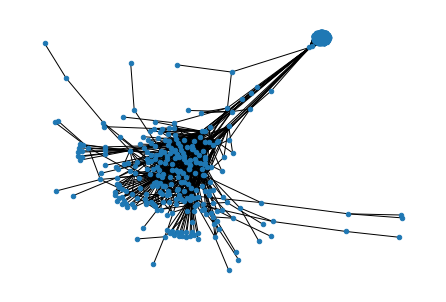

In [12]:
import matplotlib.pyplot as plt
#G=nx.from_pandas_edgelist(mmi_score, "metabolite1", "metabolite2", edge_attr=True)
G_connected = G.subgraph(Gcc[0])
# Plot it
nx.draw(G_connected, with_labels=False, node_size = 20)
plt.show()

### Degree distribution and node centrality

,count,mean,std,min,25%,50%,75%,max
0,1062.0,573.68,341.72,1.0,17.0,779.0,779.0,792.0


1062
609244


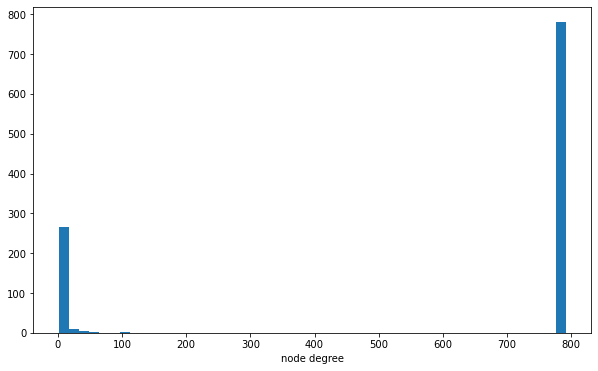

In [13]:
# degree distribution
degrees = [val for (node, val) in G_connected.degree()]
display(pd.DataFrame(pd.Series(degrees).describe()).transpose().round(2))
print(len(degrees))
print(sum(degrees))
plt.figure(figsize=(10, 6))
plt.hist(degrees, bins=50)
plt.xlabel("node degree")
plt.show()

threshold 0.7342130065975495


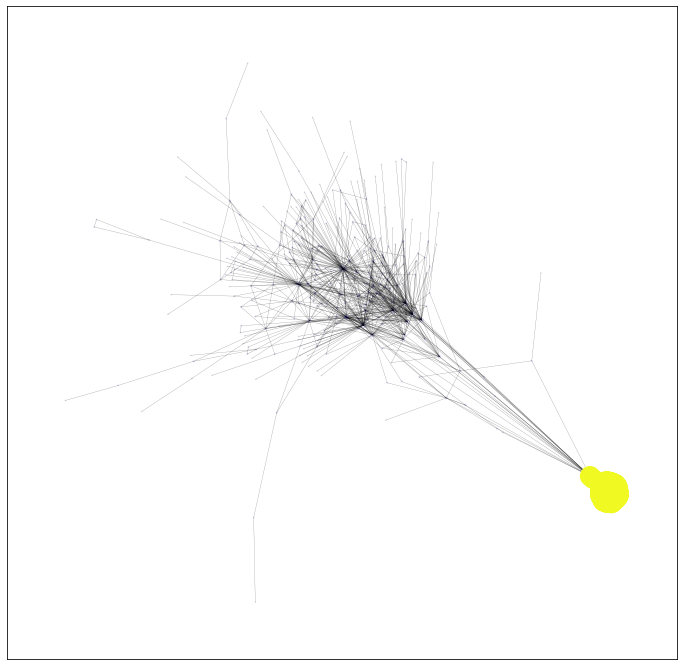

In [14]:
# node centrality

pos = nx.spring_layout(G_connected, seed=42)
cent = nx.degree_centrality(G_connected)
node_size = list(map(lambda x: x * 500, cent.values()))
cent_array = np.array(list(cent.values()))
threshold = sorted(cent_array, reverse=True)[10]
print("threshold", threshold)
cent_bin = np.where(cent_array >= threshold, 1, 0.1)
plt.figure(figsize=(12, 12))
nodes = nx.draw_networkx_nodes(G_connected, pos, node_size=node_size,
                               cmap=plt.cm.plasma,
                               node_color=cent_bin,
                               nodelist=list(cent.keys()),
                               alpha=cent_bin)
edges = nx.draw_networkx_edges(G_connected, pos, width=0.25, alpha=0.5)
plt.show()

#### Investigating why some nodes are hyperconnected

In [15]:
G_connected.degree()

DegreeView({'M35': 3, 'M93': 63, 'M444': 17, 'M561': 48, 'M98': 4, 'M189': 3, 'M209': 64, 'M231': 21, 'M234': 21, 'M241': 12, 'M244': 18, 'M252': 37, 'M254': 2, 'M278': 4, 'M339': 4, 'M340': 34, 'M355': 15, 'M381': 6, 'M397': 7, 'M415': 20, 'M460': 14, 'M461': 105, 'M480': 784, 'M491': 7, 'M512': 792, 'M535': 6, 'M536': 5, 'M563': 16, 'M565': 15, 'M566': 11, 'M796': 11, 'M800': 23, 'M811': 29, 'M815': 12, 'M823': 44, 'M825': 6, 'M917': 10, 'M1001': 3, 'M1004': 11, 'M1134': 4, 'M1141': 6, 'M1218': 7, 'M100000007': 4, 'M100000265': 6, 'M100000285': 7, 'M100000551': 3, 'M100000936': 10, 'M100001034': 9, 'M100001635': 2, 'M100001662': 3, 'M100001734': 3, 'M100002070': 1, 'M100002113': 5, 'M100002397': 7, 'M100002528': 21, 'M100002537': 4, 'M100002544': 3, 'M100004523': 7, 'M100020205': 3, 'M100020417': 4, 'M100000036': 5, 'M100003450': 9, 'M100004056': 5, 'M100003109': 4, 'M344': 6, 'M391': 7, 'M533': 17, 'M100000096': 3, 'M100000282': 4, 'M100000961': 2, 'M1124': 5, 'M1258': 10, 'M1000007

In [211]:
G_connected.degree('M100009271')

779

In [212]:
result_df[result_df['metabolite1']=='M100009271']

,metabolite1,metabolite2,reactions,reaction_score
163368,M100009271,M1528,"R01578, R04935, R00135, R01687, R09845, R04159...",7
163369,M100009271,M100009272,"R01578, R04935, R00135, R01687, R09845, R04159...",7
163370,M100009271,M100009326,"R01578, R04935, R00135, R01687, R09845, R04159...",7
163371,M100009271,M100009328,"R01578, R04935, R00135, R01687, R09845, R04159...",7
163372,M100009271,M100009329,"R01578, R04935, R00135, R01687, R09845, R04159...",7
...,...,...,...,...
163894,M100009271,M100001466,"R01578, R04935, R00135, R01687, R09845, R04159...",7
163895,M100009271,M100001472,"R01578, R04935, R00135, R01687, R09845, R04159...",7
163896,M100009271,M100001501,"R01578, R04935, R00135, R01687, R09845, R04159...",7
163897,M100009271,M100001502,"R01578, R04935, R00135, R01687, R09845, R04159...",7


#### Investigate nodes

In [17]:
# Get the degree of each node
degrees = dict(G_connected.degree())
# Sort nodes by degree in descending order
sorted_nodes = sorted(degrees, key=degrees.get, reverse=True)
sorted_nodes = pd.DataFrame({'Node': sorted_nodes, 'Degree': [degrees[node] for node in sorted_nodes]})

sorted_nodes

,Node,Degree
0,M512,792
1,M480,784
2,M100001332,779
3,M100001561,779
4,M100001654,779
...,...,...
1057,M100001211,1
1058,M100004084,1
1059,M100001400,1
1060,M100002220,1


In [36]:
sorted_nodes.iloc[0:780,]

,Node,Degree
0,M512,792
1,M480,784
2,M100001332,779
3,M100001561,779
4,M100001654,779
...,...,...
775,M100021947,779
776,M100021948,779
777,M100022172,779
778,M1528,779


780 out of the 1062 matched metabolites have >779 degree. If removed, the remaining graph would be super small (~25% of the matched compounds).

#### Investigate reactions

In [213]:
result_df[result_df['metabolite1']=='M100009271'].iloc[0,:].reactions

'R01578, R04935, R00135, R01687, R09845, R04159, R04869'

In [214]:
# get kegg reactions information

kegg_reactions_files = "../data/KEGG/kegg_reactions.csv"
kegg_reactions = pd.read_csv(kegg_reactions_files)
kegg_reactions

,ENTRY,NAME,ENZYME,RCLASS,PATHWAY
0,R00001,polyphosphate polyphosphohydrolase,3.6.1.10,NaN,NaN
1,R00002,Reduced ferredoxin:dinitrogen oxidoreductase (...,1.18.6.1,RC00002 C00002_C00008,NaN
2,R00004,diphosphate phosphohydrolase;///pyrophosphate ...,3.6.1.1,NaN,NaN
3,R00005,urea-1-carboxylate amidohydrolase,3.5.1.54,RC02756 C00011_C01010,rn00220: Arginine biosynthesis///rn00791: Atra...
4,R00006,pyruvate:pyruvate acetaldehydetransferase (dec...,2.2.1.6,RC00106 C00022_C00900,NaN
...,...,...,...,...,...
11906,R13140,NaN,1.4.3.27,NaN,NaN
11907,R13141,"homospermidine:oxygen oxidase (deaminating, cy...",1.4.3.27,NaN,NaN
11908,R13142,NaN,1.14.14.173,RC03586 C21103_C22290,NaN
11909,R13143,NaN,1.14.14.173,NaN,NaN


In [215]:
kegg_reactions[kegg_reactions['ENTRY'].isin(['R01578', 'R04935', 'R00135', 'R01687', 'R09845', 'R04159', 'R04869'])]

,ENTRY,NAME,ENZYME,RCLASS,PATHWAY
111,R00135,NaN,3.4.11.5,NaN,rn00330: Arginine and proline metabolism///rn0...
1334,R01578,NaN,NaN,NaN,NaN
1418,R01687,(5-L-glutamyl)-peptide:taurine 5-glutamyltrans...,2.3.2.2,RC00064 C00012_C03193///RC00096 C00245_C05844,rn00430: Taurine and hypotaurine metabolism
3523,R04159,(5-L-glutamyl)-peptide:amino-acid 5-glutamyltr...,2.3.2.2,RC00064 C00012_C03193 C00045_C03363,NaN
4117,R04869,NaN,3.4.-.-,RC01227 C05552_C06250,rn00780: Biotin metabolism///rn01100: Metaboli...
4176,R04935,(5-L-glutamyl)-peptide:Se-Methylselenocysteine...,2.3.2.2,RC00064 C00012_C03193 C05689_C05695,NaN
8697,R09845,CAAX protease,3.4.22.-///3.4.24.84,RC00141 C04506_C20120,rn00900: Terpenoid backbone biosynthesis///rn0...


These are reactions that involve 'peptide' , so it's likely that all compounds that are peptides are assigned these reactions

In [216]:
value_counts = result_df['reactions'].value_counts()
print(value_counts)


R01578, R04935, R00135, R01687, R09845, R04159, R04869    302253
R01687                                                       778
R00135                                                       778
R04720                                                        10
R12501                                                         8
                                                           ...  
R07629                                                         1
R03870, R10778                                                 1
R00913                                                         1
R01911                                                         1
R08176                                                         1
Name: reactions, Length: 629, dtype: int64


In [217]:
value_counts[0]/result_df.shape[0]*100

99.21254414873364

These 7 reactions account for 99.21% of the links in the network. Let's see how the graph is if they get removed.

In [218]:
# Define the reaction codes you want to exclude
reactions_exclude = {'R00135', 'R01687', 'R04869', 'R04935', 'R04159', 'R01578', 'R09845'}  
# Filter the result_df to exclude the specified reaction codes
result_df_f = result_df[~result_df['reactions'].apply(lambda x: any(code in x for code in reactions_exclude))]
# Display the filtered result_df
print(result_df_f)

       metabolite1 metabolite2               reactions  reaction_score
0              M35         M93                  R00668               1
1              M35        M444                  R00668               1
2              M35        M561                  R00668               1
3              M93         M98                  R12688               1
4              M93        M189                  R03451               1
...            ...         ...                     ...             ...
304646  M100001933  M100015982                  R08313               1
304647  M100001992  M100002028  R03406, R02499, R03407               3
304648  M100002067  M100002129          R08978, R08942               2
304649  M100002410  M100002968                  R05727               1
304650  M100008930  M100004020                  R08176               1

[843 rows x 4 columns]


### Visual of the graph

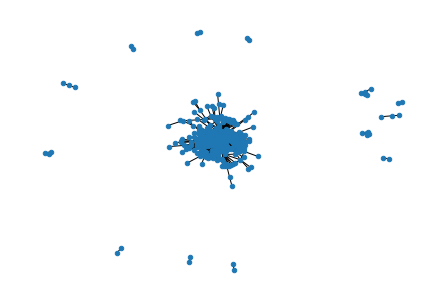

In [219]:
import matplotlib.pyplot as plt
G=nx.from_pandas_edgelist(result_df_f, "metabolite1", "metabolite2", edge_attr=True)

# Plot it
nx.draw(G, with_labels=False, node_size = 20)
plt.show()

### Degree distribution and node centrality

,count,mean,std,min,25%,50%,75%,max
0,319.0,5.29,9.86,1.0,1.0,3.0,5.0,105.0


319
1686


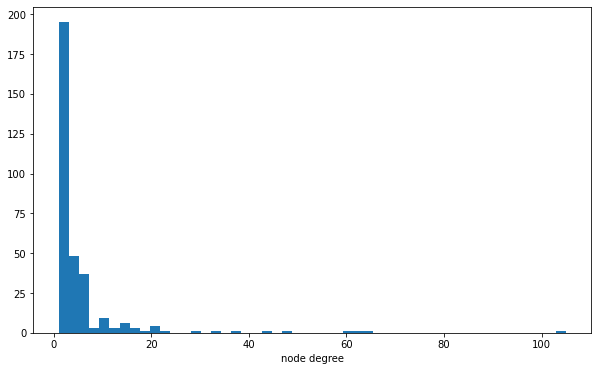

In [220]:
# degree distribution
degrees = [val for (node, val) in G.degree()]
display(pd.DataFrame(pd.Series(degrees).describe()).transpose().round(2))
print(len(degrees))
print(sum(degrees))
plt.figure(figsize=(10, 6))
plt.hist(degrees, bins=50)
plt.xlabel("node degree")
plt.show()

threshold 0.0660377358490566


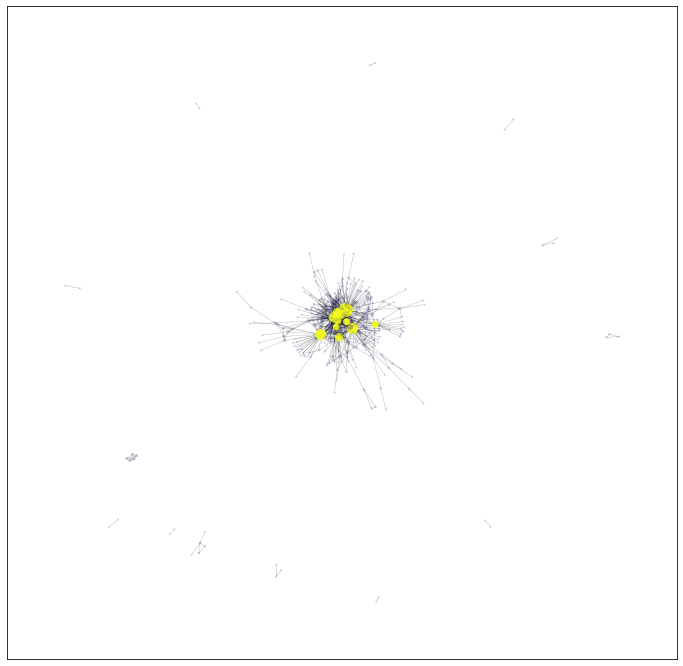

In [221]:
# node centrality

pos = nx.spring_layout(G, seed=42)
cent = nx.degree_centrality(G)
node_size = list(map(lambda x: x * 500, cent.values()))
cent_array = np.array(list(cent.values()))
threshold = sorted(cent_array, reverse=True)[10]
print("threshold", threshold)
cent_bin = np.where(cent_array >= threshold, 1, 0.1)
plt.figure(figsize=(12, 12))
nodes = nx.draw_networkx_nodes(G, pos, node_size=node_size,
                               cmap=plt.cm.plasma,
                               node_color=cent_bin,
                               nodelist=list(cent.keys()),
                               alpha=cent_bin)
edges = nx.draw_networkx_edges(G, pos, width=0.25, alpha=0.5)
plt.show()

In [222]:
result_df_f.to_csv("../data/KEGG/kegg_links_filtered.csv", index=False)